# Bar Charts and Analyzing Data from CSVs

In [1]:
# importing matplotlib library
from matplotlib import pyplot as plt
%matplotlib notebook

In [2]:
# custom style 
plt.style.use('fivethirtyeight')

In [3]:
x_ages = [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]
ml_salary = [38496, 42000, 46752, 49320, 53200,
         56000, 62316, 64928, 67317, 68748, 73752]

<IPython.core.display.Javascript object>


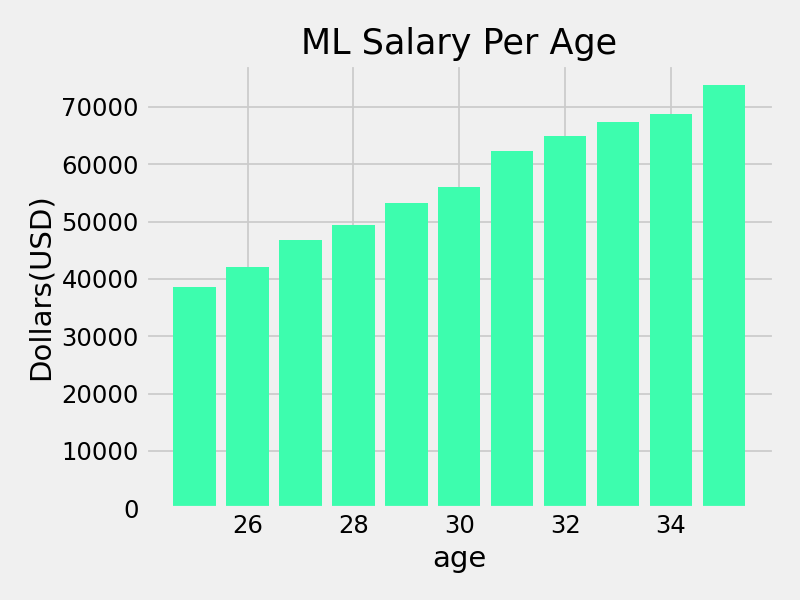

In [4]:
# we can create a bar chart by simply calling bar function
plt.bar(x_ages, ml_salary,  color='#3DFDAEFF')
# the rest of decoration remains the same
plt.title('ML Salary Per Age')
plt.xlabel('age')
plt.ylabel('Dollars(USD)')
plt.tight_layout()
plt.show()

## Combining bar and line charts

<IPython.core.display.Javascript object>


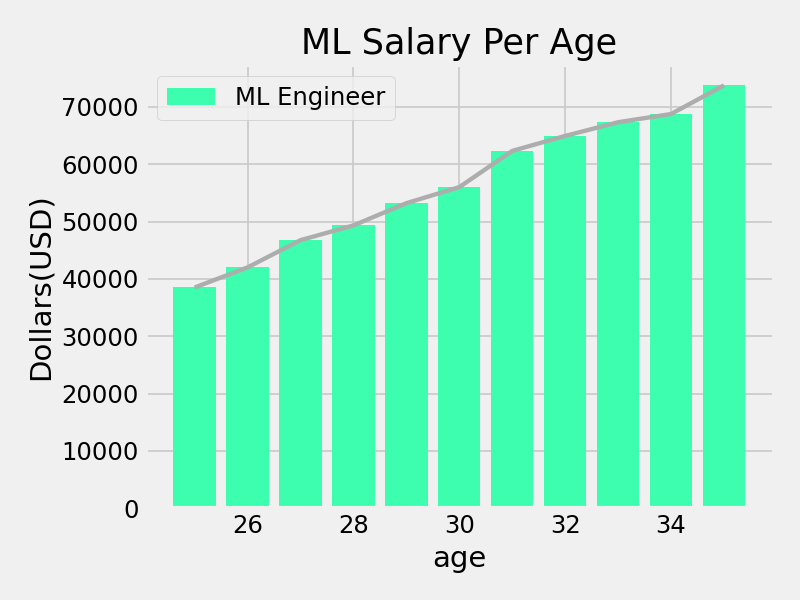

In [5]:
plt.bar(x_ages, ml_salary,  color='#3DFDAEFF', label='ML Engineer')
plt.plot(x_ages, ml_salary,  color='#ADADAD', linewidth=2.5)

# the rest of decoration remains the same
plt.title('ML Salary Per Age')
plt.xlabel('age')
plt.ylabel('Dollars(USD)')
plt.tight_layout()
plt.legend()
plt.show()

## Multiple bar charts in same plot and it's problem

In [6]:
# Data Analyst salary
da_salary = [37426, 38000, 42752, 44320, 49200,
         53000, 55316, 56928, 59317, 60748, 62122]
# Data Engineer salary
de_salary = [38426, 39000, 43752, 45320, 50200,
         55000, 61316, 62928, 66317, 67748, 67122]

<IPython.core.display.Javascript object>


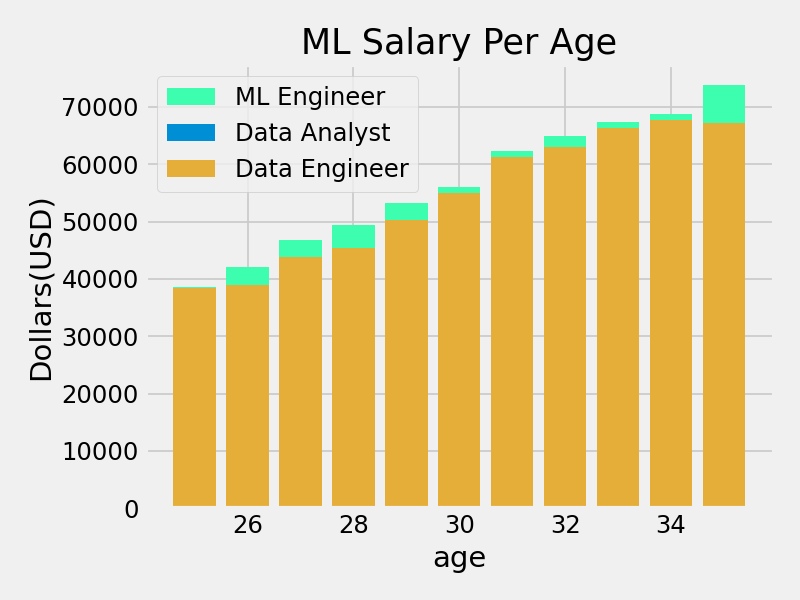

In [7]:
# calling multiple times bar function
plt.bar(x_ages, ml_salary,  color='#3DFDAEFF', label='ML Engineer')
plt.bar(x_ages, da_salary,  color='#008FD5', label='Data Analyst')
plt.bar(x_ages, de_salary,  color='#E5AE38', label='Data Engineer')

# the rest of decoration remains the same
plt.title('ML Salary Per Age')
plt.xlabel('age')
plt.ylabel('Dollars(USD)')
plt.tight_layout()
plt.legend()
plt.show()

## Hack fix

In [8]:
# create a numbered version of our x values
x_indexes = [i for i in range(0, len(x_ages))]
x_indexes

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

<IPython.core.display.Javascript object>


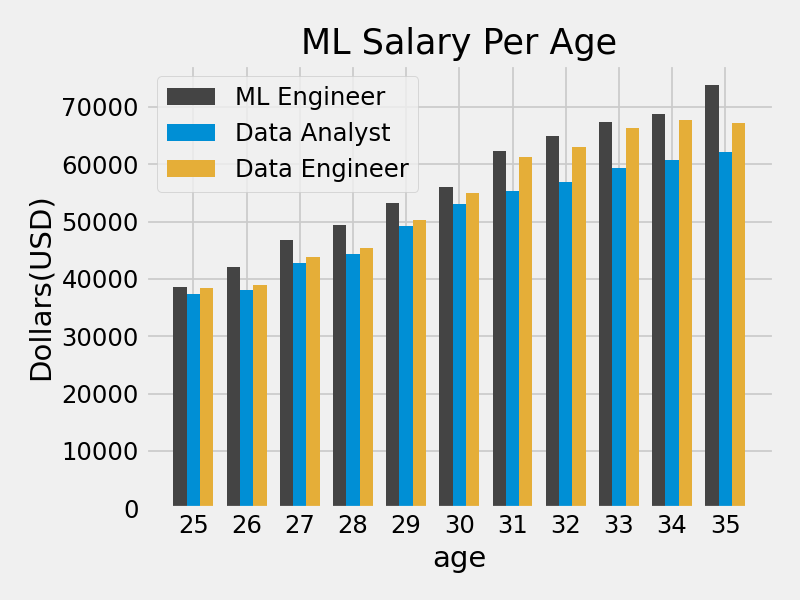

In [9]:
# custom bar width
bar_width = 0.25

# calling multiple times bar function
plt.bar([x-bar_width for x in x_indexes], ml_salary,  width=bar_width, color='#444444', label='ML Engineer')
plt.bar(x_indexes, da_salary, width=bar_width, color='#008FD5', label='Data Analyst')
plt.bar([x+bar_width for x in x_indexes], de_salary, width=bar_width, color='#E5AE38', label='Data Engineer')

# putting back the desired x values
plt.xticks(ticks=x_indexes, labels=x_ages)
# the rest of decoration remains the same
plt.title('ML Salary Per Age')
plt.xlabel('age')
plt.ylabel('Dollars(USD)')
plt.tight_layout()
plt.legend()
plt.show()

## Parse and store data from csv

In [10]:
from csv import DictReader
from collections import Counter

In [11]:
try:
    with open('data.csv', 'r', encoding='utf-8') as file:
        csv_reader = DictReader(file)
        language_counter = Counter()
        for row in csv_reader:
            languages = row['LanguagesWorkedWith'].split(';')
            language_counter.update(languages)
        print(language_counter)
except FileNotFoundError:
    print('File not found in path.')

Counter({'JavaScript': 59219, 'HTML/CSS': 55466, 'SQL': 47544, 'Python': 36443, 'Java': 35917, 'Bash/Shell/PowerShell': 31991, 'C#': 27097, 'PHP': 23030, 'C++': 20524, 'TypeScript': 18523, 'C': 18017, 'Other(s):': 7920, 'Ruby': 7331, 'Go': 7201, 'Assembly': 5833, 'Swift': 5744, 'Kotlin': 5620, 'R': 5048, 'VBA': 4781, 'Objective-C': 4191, 'Scala': 3309, 'Rust': 2794, 'Dart': 1683, 'Elixir': 1260, 'Clojure': 1254, 'WebAssembly': 1015, 'F#': 973, 'Erlang': 777})


In [12]:
# language represents x axis
# language represents y axis
language = []
popularity = []
for item in language_counter.most_common(15):
    language.append(item[0])
    popularity.append(item[1])

In [13]:
# ploting data preview
print(language)
print(popularity)

['JavaScript', 'HTML/CSS', 'SQL', 'Python', 'Java', 'Bash/Shell/PowerShell', 'C#', 'PHP', 'C++', 'TypeScript', 'C', 'Other(s):', 'Ruby', 'Go', 'Assembly']
[59219, 55466, 47544, 36443, 35917, 31991, 27097, 23030, 20524, 18523, 18017, 7920, 7331, 7201, 5833]


<IPython.core.display.Javascript object>


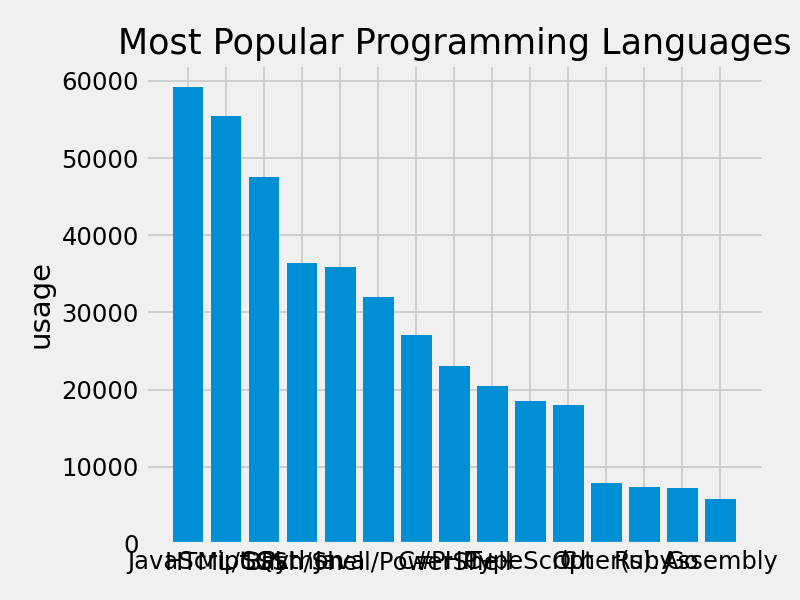

In [14]:
# creating vertical bar plot 
plt.bar(language, popularity)
plt.title('Most Popular Programming Languages')
plt.ylabel('usage')
plt.tight_layout()
plt.show()

In [15]:
#In the above chart, due to many x values chart looks ugly. We can fix this by ploting a horizontal bar chart (instead of vertical)

<IPython.core.display.Javascript object>


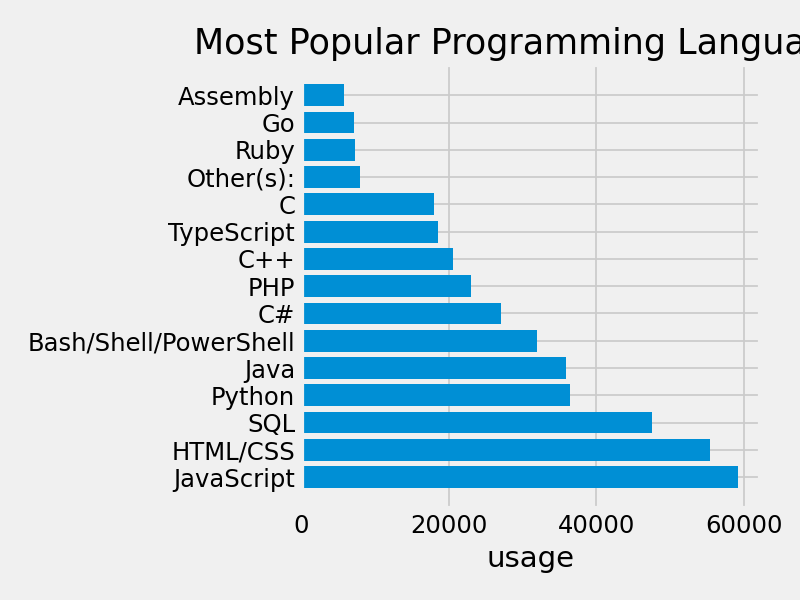

In [16]:
# creating horizontal bar plot 
plt.barh(language, popularity)
plt.title('Most Popular Programming Languages')
plt.xlabel('usage')
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


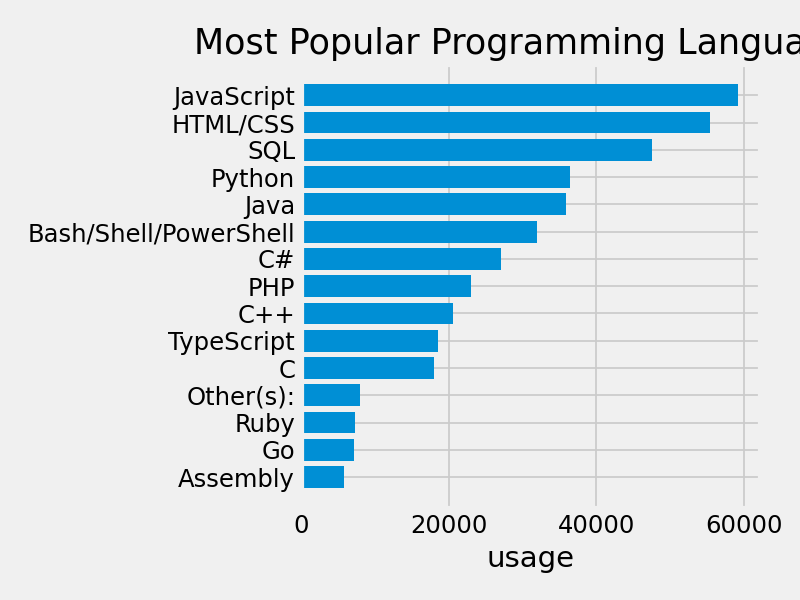

In [17]:
# To plot it from most popular to less, we reverse the lists
language.reverse()
popularity.reverse()

# creating horizontal bar plot 
plt.barh(language, popularity)
plt.title('Most Popular Programming Languages')
plt.xlabel('usage')
plt.tight_layout()
plt.show()

## Parsing and storing the data using pandas

In [18]:
from pandas import read_csv

In [19]:
data = read_csv('data.csv')

In [20]:
data['LanguagesWorkedWith'] = data['LanguagesWorkedWith'].str.split(';')
languages = data['LanguagesWorkedWith']

In [21]:
counter = Counter()
for row in languages:
    counter.update(row)
counter

Counter({'HTML/CSS': 55466,
         'Java': 35917,
         'JavaScript': 59219,
         'Python': 36443,
         'C++': 20524,
         'C': 18017,
         'C#': 27097,
         'SQL': 47544,
         'VBA': 4781,
         'R': 5048,
         'Bash/Shell/PowerShell': 31991,
         'Ruby': 7331,
         'Rust': 2794,
         'TypeScript': 18523,
         'WebAssembly': 1015,
         'Other(s):': 7920,
         'Go': 7201,
         'PHP': 23030,
         'Assembly': 5833,
         'Kotlin': 5620,
         'Swift': 5744,
         'Objective-C': 4191,
         'Elixir': 1260,
         'Erlang': 777,
         'Clojure': 1254,
         'F#': 973,
         'Scala': 3309,
         'Dart': 1683})